## Question1- import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation.

In [193]:
import numpy as np
import pandas as pd
import pandas_profiling as pf
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

# From problem statement
* dataset contains 5000 records
* personal loan shall be our target variable

In [194]:
# Reading data from csv file and naming the data frame as ccData - credit card data
ccData = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# Data types present in dataframe ccData
ccData.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [195]:
#statistical summary

ccData.describe().transpose()


count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* Average Age is 45 years
* Experience have negative values
* 90% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
* Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
* Around 60% of customers use internet banking facilities.
* Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
* Around 90% of the customer doesn’t have a securities account with the bank.

In [196]:
# shape of data
ccData.shape

(5000, 14)

In [197]:
# check for null values
ccData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [198]:
# check for na values
ccData.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [199]:
# incorrect imputation
ccData.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## Q2 EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings

#### Number of unique in each column?

In [200]:
# Number of unique in column(s)
ccData.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [201]:
# Number of unique in column Age - if we have to find for a perticular column
ccData.Age.nunique()

45

#### Numberof people with zero mortgage?

In [202]:
(ccData['Mortgage']==0).sum()

3462

In [203]:
ccData.shape

(5000, 14)

#### Number of people with zero credit card spending per month?

In [204]:
(ccData['CCAvg']==0).sum()

106

#### Value counts of all categorical columns

In [205]:
ccData['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [206]:
ccData['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

# Univariate and Bivariate

In [207]:
# Let's get over all summary of data using profile_report

ccData.profile_report()

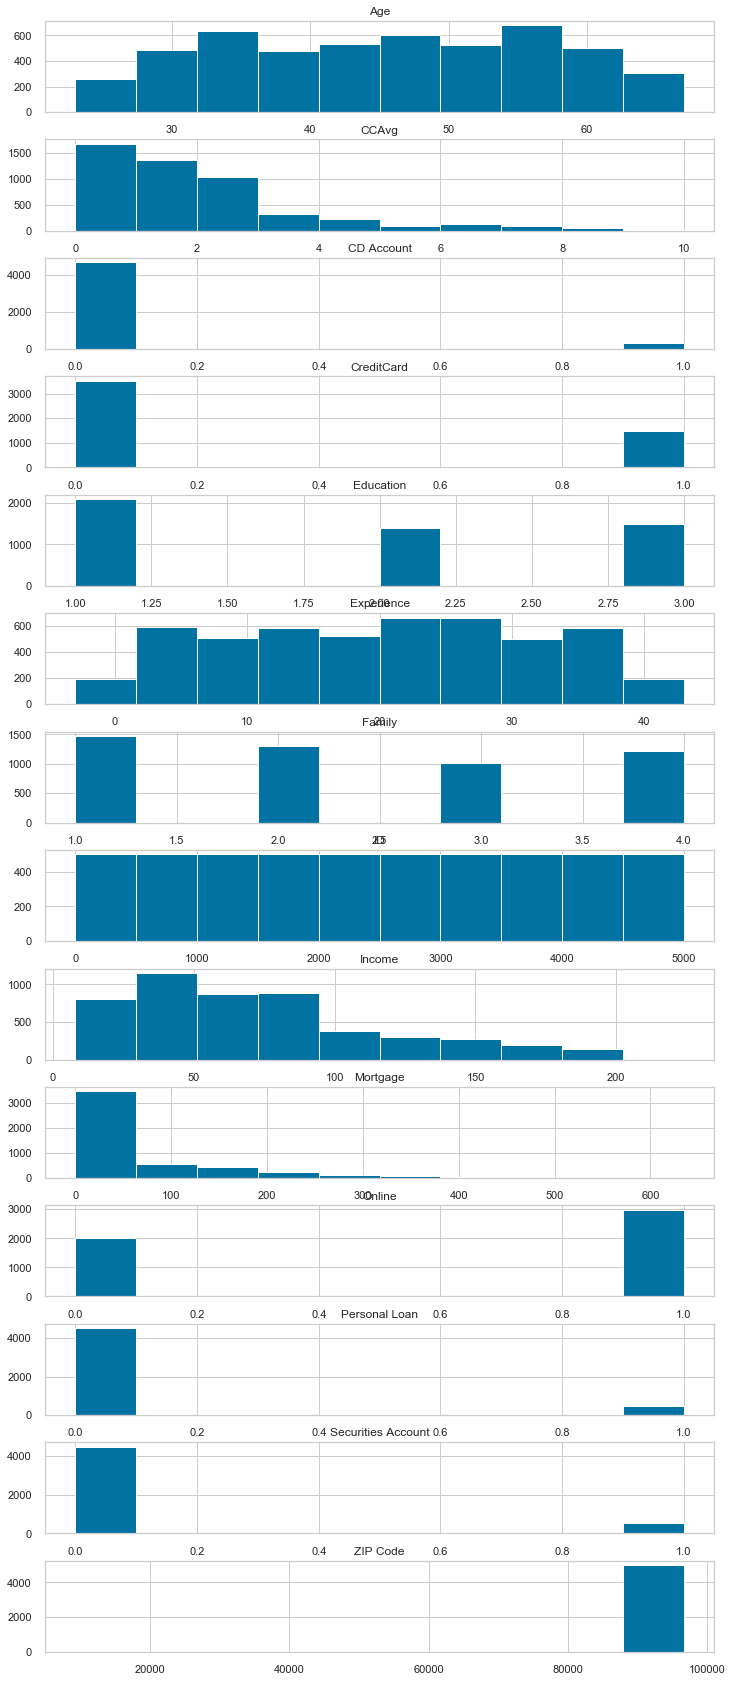

In [208]:
colums=ccData.columns
ccData[colums].hist(stacked=False, bins=10, figsize=(12,30), layout=(14,1));

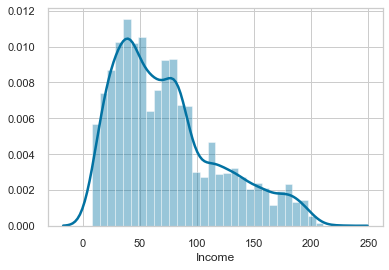

In [209]:
sns.distplot(ccData['Income'])

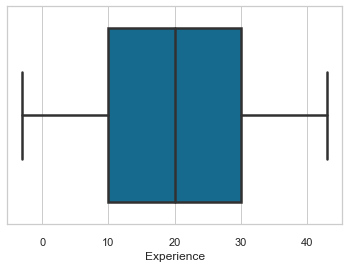

In [210]:
sns.boxplot(ccData['Experience'])

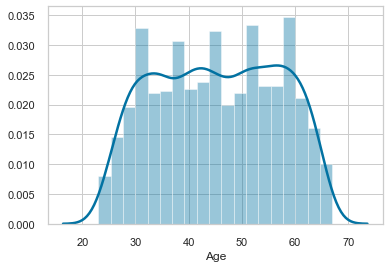

In [211]:
sns.distplot(ccData['Age'])

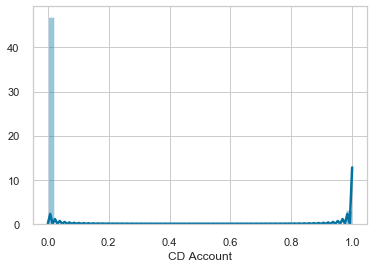

In [212]:
sns.distplot(ccData['CD Account'])

# Observations on Data

- Dataset got zero missing cells
- Dataset has following Numeric Variables 
-- ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’
- Dataset got 2 categorical variables: ‘Education’, ‘Family’
- Dataset got 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’
- 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.
- Around 29% of the customer’s family size is 1.
- 94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
- Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
- Around 60% of customers use internet banking facilities.
- Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
- Around 90% of the customer doesn’t have a securities account with the bank.
- 'Age' Experience are normally distributed with most of customers falling between 30-60 years and experience between 10-30 years. Mean age of customer is 45
- CCAvg, Income, Mortgage are positively skewed with most of income falling between 10-100k 
- Experience is highly correlated with Age
- Age is highly correlated with Experience


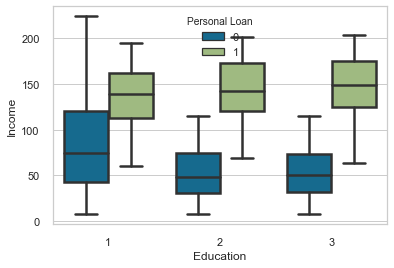

In [213]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=ccData)


# Observations

1- Customer who have education level 1 are most earning 

2- Customers who have availed Personal Loan they have similar income regardless of eduction which means education doesn't impact the decision of availing personal loan


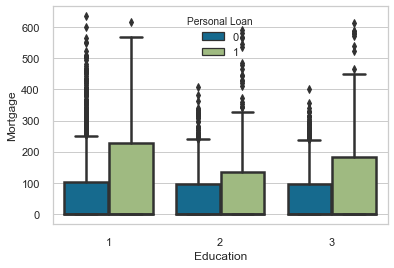

In [214]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=ccData)


## Observation

Customers with higher mortgage avail personal loans

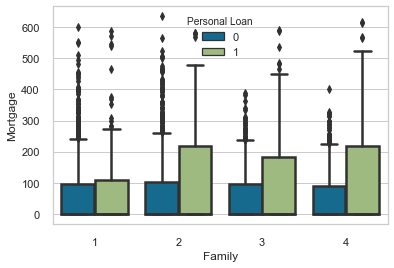

In [215]:
sns.boxplot(x="Family", y='Mortgage', hue="Personal Loan", data=ccData)



## Observation
 Looks like family of any size will go for personal loans


In [216]:
familysize_no = np.mean( ccData[ccData['Personal Loan'] == 0]['Family'] )
familysize_no

2.3734513274336284

In [217]:
familysize_no = np.mean( ccData[ccData['Personal Loan'] == 1]['Family'] )
familysize_no

2.6125

Which means Family size does not have much impact decision to for loan

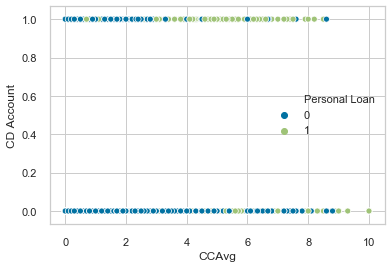

In [218]:
sns.scatterplot(x="CCAvg", y='CD Account', hue="Personal Loan", data=ccData);


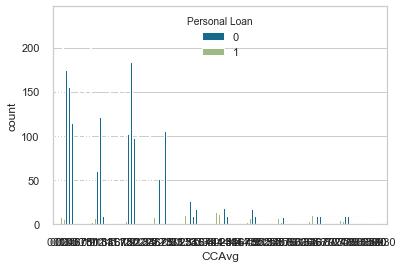

In [219]:
sns.countplot(x="CCAvg", data=ccData,hue="Personal Loan")


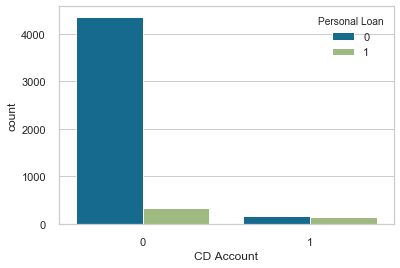

In [220]:
sns.countplot(x="CD Account", data=ccData,hue="Personal Loan")



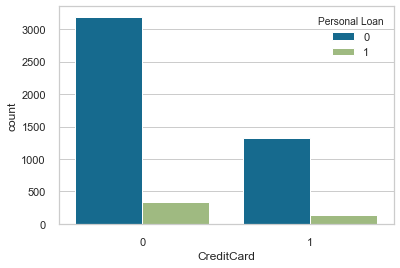

In [221]:
sns.countplot(x="CreditCard", data=ccData,hue="Personal Loan");


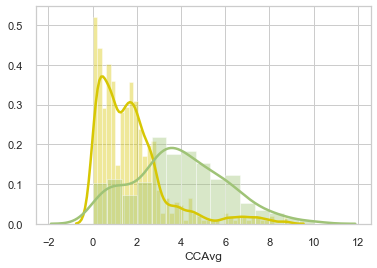

In [222]:
sns.distplot(ccData[ccData['Personal Loan']==0]['CCAvg'], color='y')
sns.distplot(ccData[ccData['Personal Loan']==1]['CCAvg'], color='g')

## Observation
Customers who have personal load also have higher credit card average expenditure

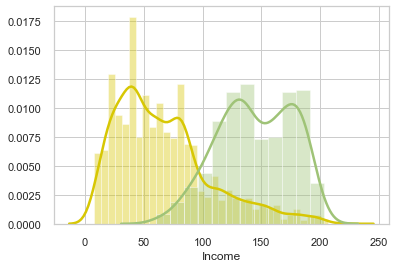

In [223]:
sns.distplot(ccData[ccData['Personal Loan']==0]['Income'], color='y')
sns.distplot(ccData[ccData['Personal Loan']==1]['Income'], color='g')

## Observartion

Higher income less probability of buying personal loan

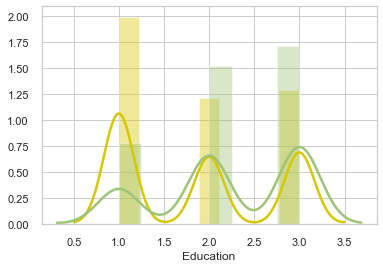

In [224]:
sns.distplot(ccData[ccData['Personal Loan']==0]['Education'], color='y')
sns.distplot(ccData[ccData['Personal Loan']==1]['Education'], color='g')

## Observation
Higher education level more probability of buying personal loan

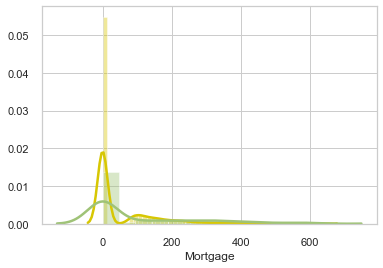

In [225]:
sns.distplot(ccData[ccData['Personal Loan']==0]['Mortgage'], color='y')
sns.distplot(ccData[ccData['Personal Loan']==1]['Mortgage'], color='g')

In [226]:
ccData.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

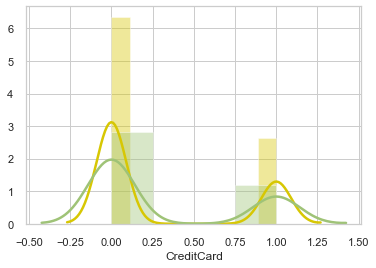

In [227]:
sns.distplot(ccData[ccData['Personal Loan']==0]['CreditCard'], color='y')
sns.distplot(ccData[ccData['Personal Loan']==1]['CreditCard'], color='g')

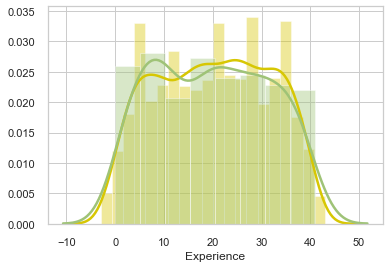

In [228]:
sns.distplot(ccData[ccData['Personal Loan']==0]['Experience'], color='y')
sns.distplot(ccData[ccData['Personal Loan']==1]['Experience'], color='g')

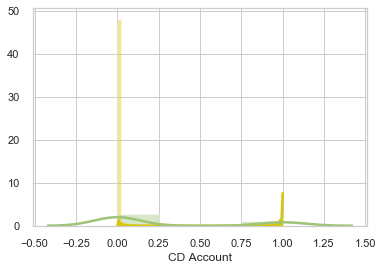

In [229]:
sns.distplot(ccData[ccData['Personal Loan']==0]['CD Account'], color='y')
sns.distplot(ccData[ccData['Personal Loan']==1]['CD Account'], color='g')

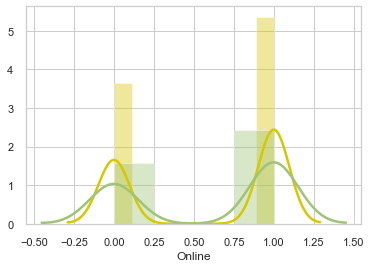

In [230]:
sns.distplot(ccData[ccData['Personal Loan']==0]['Online'], color='y')
sns.distplot(ccData[ccData['Personal Loan']==1]['Online'], color='g')

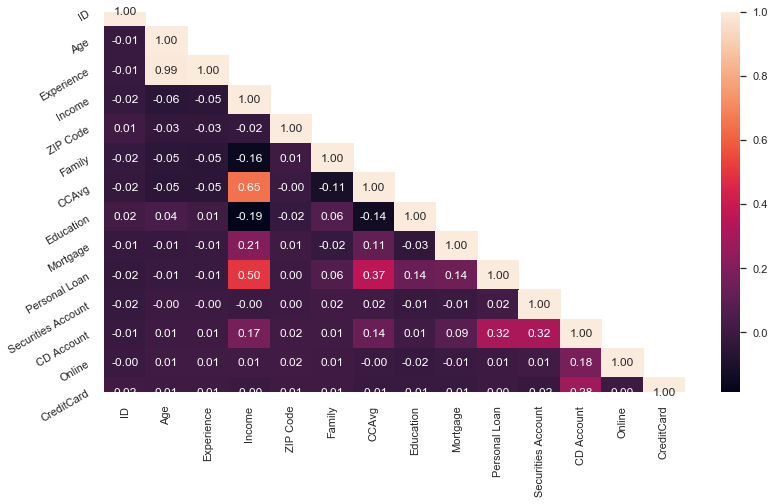

In [231]:
corr = ccData.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [232]:
#Looking into the distribution to the various attributes in relation with the target.
ccData.groupby(ccData['Personal Loan']).mean()


ID        Age  Experience      Income      ZIP Code  \
Personal Loan                                                                 
0              2512.165487  45.367257   20.132301   66.237389  93152.428761   
1              2390.650000  45.066667   19.843750  144.745833  93153.202083   

                 Family     CCAvg  Education    Mortgage  Securities Account  \
Personal Loan                                                                  
0              2.373451  1.729009   1.843584   51.789381            0.102212   
1              2.612500  3.905354   2.233333  100.845833            0.125000   

               CD Account    Online  CreditCard  
Personal Loan                                    
0                0.035841  0.595796    0.293584  
1                0.291667  0.606250    0.297917

## Final Observations

- Based upon above table customers income, CCAvg, Mortage can affect buying of personal loan. 

# Getting Data Model Ready

In [233]:
# Let's drop Experience which have some negative values, ID and Zip Code
ccData.drop(columns ='ID',inplace=True)
ccData.drop(columns ='Experience',inplace= True)
ccData.drop(columns ='ZIP Code',inplace= True)

In [234]:
ccData.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [235]:
ccData['Personal Loan'].value_counts(normalize=True) 

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [236]:
# highly imbalanced data, classes are not equally wighted
# That means we cannot rely on accuracy score alone

# Q3- Splitt he data into training and test set in the ratio of 70:30 

In [237]:
# Take target variable out but first let's set the independent variables
x = ccData.drop('Personal Loan', axis=1)
#Now let's set dependent or target variable
y = ccData['Personal Loan']

In [238]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)

In [239]:
ccData.shape

(5000, 11)

In [240]:
x_train.shape

(3500, 10)

In [241]:
x_test.shape

(1500, 10)

In [242]:
x_train.describe().transpose()

count       mean         std   min   25%   50%     75%  \
Age                 3500.0  45.435429   11.507821  23.0  35.0  45.0   55.00   
Income              3500.0  73.640000   46.168251   8.0  39.0  63.0   98.00   
Family              3500.0   2.395143    1.145654   1.0   1.0   2.0    3.00   
CCAvg               3500.0   1.934306    1.734706   0.0   0.7   1.5    2.50   
Education           3500.0   1.886286    0.839634   1.0   1.0   2.0    3.00   
Mortgage            3500.0  56.054857  100.523942   0.0   0.0   0.0  100.25   
Securities Account  3500.0   0.104571    0.306044   0.0   0.0   0.0    0.00   
CD Account          3500.0   0.062571    0.242225   0.0   0.0   0.0    0.00   
Online              3500.0   0.591143    0.491693   0.0   0.0   1.0    1.00   
CreditCard          3500.0   0.297429    0.457192   0.0   0.0   0.0    1.00   

                      max  
Age                  67.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            617.0  
Securities Account    1.0  
CD Account            1.0  
Online                1.0  
CreditCard            1.0

In [243]:
x_test.describe().transpose()

count       mean         std   min    25%   50%    75%  \
Age                 1500.0  45.112000   11.358879  23.0  35.00  45.0   55.0   
Income              1500.0  74.087333   45.732111   8.0  39.00  64.0  101.0   
Family              1500.0   2.399333    1.152715   1.0   1.00   2.0    3.0   
CCAvg               1500.0   1.946413    1.778071   0.0   0.67   1.5    2.6   
Education           1500.0   1.868667    0.840569   1.0   1.00   2.0    3.0   
Mortgage            1500.0  57.534667  104.464156   0.0   0.00   0.0  102.0   
Securities Account  1500.0   0.104000    0.305362   0.0   0.00   0.0    0.0   
CD Account          1500.0   0.055333    0.228706   0.0   0.00   0.0    0.0   
Online              1500.0   0.610000    0.487913   0.0   0.00   1.0    1.0   
CreditCard          1500.0   0.286000    0.452040   0.0   0.00   0.0    1.0   

                      max  
Age                  67.0  
Income              202.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Securities Account    1.0  
CD Account            1.0  
Online                1.0  
CreditCard            1.0

# Q4- Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance

In [244]:
#Let's check few things from statsmodel first
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.124461
         Iterations 9


In [245]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 08 May 2020   Pseudo R-squ.:                  0.6023
Time:                        14:52:42   Log-Likelihood:                -435.61
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.151e-277
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.7674      0.819    -16.807      0.000     -15.373     -12.162
Age                    0.0050      0.008      0.644      0.520      -0.010       0.020
Income                 0.0537      0.003     16.872      0.000       0.047       0.060
Family                 0.7299      0.093      7.865      0.000       0.548       0.912
CCAvg                  0.1718      0.049      3.538      0.000       0.077       0.267
Education              1.7213      0.139     12.382      0.000       1.449       1.994
Mortgage               0.0008      0.001      1.148      0.251      -0.001       0.002
Securities Account    -1.1962      0.371     -3.226      0.001      -1.923      -0.469
CD Account             3.8829      0.399      9.726      0.000       3.100       4.665
Online                -0.6347      0.191     -3.327      0.001      -1.009      -0.261
CreditCard            -1.1790      0.250     -4.710      0.000      -1.670      -0.688
======================================================================================
"""

In [246]:
#calcualte odds ratio, probablity 
lg.params

const                -13.767390
Age                    0.005050
Income                 0.053729
Family                 0.729861
CCAvg                  0.171772
Education              1.721347
Mortgage               0.000775
Securities Account    -1.196237
CD Account             3.882931
Online                -0.634715
CreditCard            -1.178952
dtype: float64

In [247]:
lgcoef = pd.DataFrame(lg.params, columns = ['coef'])
lgcoef['Odds_ratio'] = lgcoef['coef'].apply(lambda x: np.exp(x)) # odds ratio is calculated by etaking exp of coefficients
lgcoef

coef  Odds_ratio
const              -13.767390    0.000001
Age                  0.005050    1.005062
Income               0.053729    1.055199
Family               0.729861    2.074793
CCAvg                0.171772    1.187407
Education            1.721347    5.592054
Mortgage             0.000775    1.000775
Securities Account  -1.196237    0.302330
CD Account           3.882931   48.566332
Online              -0.634715    0.530087
CreditCard          -1.178952    0.307601

In [248]:
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef

coef  Odds_ratio  probability
const              -13.767390    0.000001     0.000001
Age                  0.005050    1.005062     0.501262
Income               0.053729    1.055199     0.513429
Family               0.729861    2.074793     0.674775
CCAvg                0.171772    1.187407     0.542838
Education            1.721347    5.592054     0.848302
Mortgage             0.000775    1.000775     0.500194
Securities Account  -1.196237    0.302330     0.232145
CD Account           3.882931   48.566332     0.979825
Online              -0.634715    0.530087     0.346442
CreditCard          -1.178952    0.307601     0.235241

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [250]:

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [251]:
y_pred = logreg.predict(x_test)



In [252]:
from sklearn.metrics import confusion_matrix, recall_score,precision_score,f1_score,roc_auc_score,accuracy_score

In [253]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()


In [254]:
logreg.score(x_train,y_train) 

0.9448571428571428

In [255]:
logreg.score(x_test,y_test) 

0.94

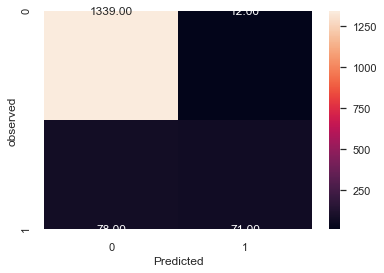

In [256]:
draw_cm(y_test,y_pred)

In [257]:
print('Accuracy on train set: {:.2f}'.format(logreg.score(x_train, y_train)))

Accuracy on train set: 0.94


In [258]:
print('Accuracy on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy on test set: 0.94


In [259]:
recall_score(y_test,y_pred)

0.47651006711409394

In [260]:
precision_score(y_test,y_pred)

0.8554216867469879

In [261]:
roc_auc_score(y_test,y_pred)

0.733813878856825

In [262]:
f1_score(y_test,y_pred)

0.6120689655172412

In [263]:
#Summary of logistic regression
#from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
#print(logreg.)

In [264]:

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1339   12]
 [  78   71]]


In [265]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1351
           1       0.86      0.48      0.61       149

    accuracy                           0.94      1500
   macro avg       0.90      0.73      0.79      1500
weighted avg       0.94      0.94      0.93      1500



In [266]:
 #!pip install yellowbrick

In [267]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

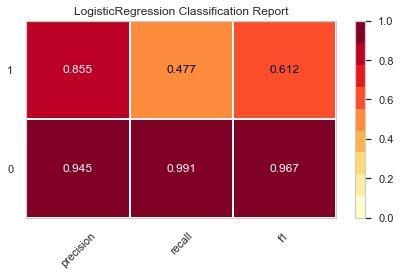

In [268]:
viz = ClassificationReport(LogisticRegression(random_state=42))
viz.fit(x_train,y_train)
viz.score(x_test,y_test)
viz.show()

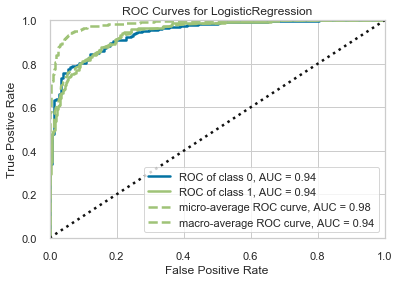

In [269]:
roc = ROCAUC(LogisticRegression(random_state=42))
roc.fit(x_train,y_train)
roc.score(x_test,y_test)
roc.show()

# Q5 - Give your reasoning on how can the model perform better? 

In [270]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [271]:
from sklearn.model_selection import GridSearchCV

In [272]:
param_grid = [{'solver': ['newton-cg','lbfgs','liblinear','sag','saga'], 'C': [0.001,0.01,0.1,0.25,0.5,0.75,1],
              'class_weight':['balanced'], 'penalty':['l2']}]
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5, verbose=0)

In [273]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1],
                          'class_weight': ['balanced'], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [274]:
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [275]:
model = LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [276]:
model.fit(x_train,y_train)
predictions = model.predict(x_test)

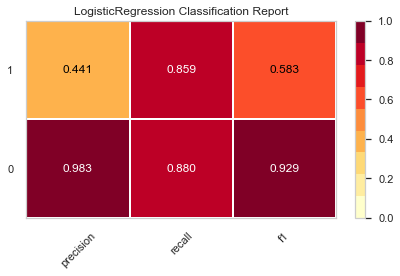

In [277]:
viz = ClassificationReport(model)
viz.fit(x_train,y_train)
viz.score(x_test,y_test)
viz.show()

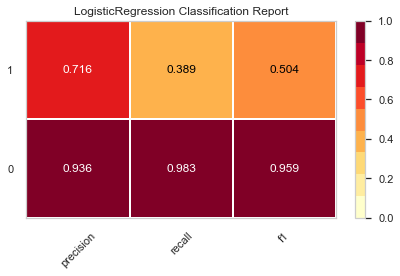

In [278]:
# Not sure about this but want to check what happens if we put class_weight=None as we higly unbalanced data of target variable
model = LogisticRegression(C=0.1, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
viz = ClassificationReport(model)
viz.fit(x_train,y_train)
viz.score(x_test,y_test)
viz.show()

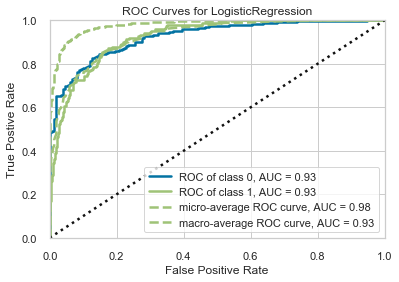

In [279]:
roc = ROCAUC(model)
roc.fit(x_train,y_train)
roc.score(x_test,y_test)
roc.show()

We should train the model with sufficiently large data set to avoid underfit/overfit issues
 
Target variable data is highly imbalanced, classes are not equally wightedl, that means we cannot rely on accuracy score alone.
     

We'll need more blanced data for model to perform better

Vary the solver of LogisticRegression
  For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.
  
Provide corect class_weight parameter to LogisticRegression
  A higher weightage to fields like income that has high correlation with the target varaible will yield better results

We can fine best best_estimator & re-apply to logistic regression model

# Q6- Give Business understanding of your model?

In [280]:
# Let's looks at statistical inteference and odds ration, probability 
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 08 May 2020   Pseudo R-squ.:                  0.6023
Time:                        14:52:50   Log-Likelihood:                -435.61
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.151e-277
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.7674      0.819    -16.807      0.000     -15.373     -12.162
Age                    0.0050      0.008      0.644      0.520      -0.010       0.020
Income                 0.0537      0.003     16.872      0.000       0.047       0.060
Family                 0.7299      0.093      7.865      0.000       0.548       0.912
CCAvg                  0.1718      0.049      3.538      0.000       0.077       0.267
Education              1.7213      0.139     12.382      0.000       1.449       1.994
Mortgage               0.0008      0.001      1.148      0.251      -0.001       0.002
Securities Account    -1.1962      0.371     -3.226      0.001      -1.923      -0.469
CD Account             3.8829      0.399      9.726      0.000       3.100       4.665
Online                -0.6347      0.191     -3.327      0.001      -1.009      -0.261
CreditCard            -1.1790      0.250     -4.710      0.000      -1.670      -0.688
======================================================================================
"""

In [281]:
lgcoef

coef  Odds_ratio  probability
const              -13.767390    0.000001     0.000001
Age                  0.005050    1.005062     0.501262
Income               0.053729    1.055199     0.513429
Family               0.729861    2.074793     0.674775
CCAvg                0.171772    1.187407     0.542838
Education            1.721347    5.592054     0.848302
Mortgage             0.000775    1.000775     0.500194
Securities Account  -1.196237    0.302330     0.232145
CD Account           3.882931   48.566332     0.979825
Online              -0.634715    0.530087     0.346442
CreditCard          -1.178952    0.307601     0.235241

In [282]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1351
           1       0.86      0.48      0.61       149

    accuracy                           0.94      1500
   macro avg       0.90      0.73      0.79      1500
weighted avg       0.94      0.94      0.93      1500



- We have see from data that CCAvg & Income had better correlation with target vaiable 'Personal loan'
- Precision value 86% means 2 customers out of 10 predicted shall not able to accept the loan
- Precion & Recall for people who'll reject the personal loan are good.
- Recall 48% for people who'll accept the loan means model shall miss around 50% potential customers 
- Mortgage Income and CCAvg have more than 50% probabilty for loan acceptance
- Customers having CD Account have higher probability & 48 times higher odds to accept loans
